In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(data_url)

In [4]:
# Basic exploration
titanic.tail(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Handle Missing Values
age_mean = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(age_mean)

In [9]:
age_mean

np.float64(29.69911764705882)

In [10]:
# Replace missing values in 'Grade' with the mode
Cabin_mode = titanic['Cabin'].mode()[0]
titanic['Cabin'] = titanic['Cabin'].fillna('cabin_mode')

In [11]:
Cabin_mode

'B96 B98'

In [12]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [13]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

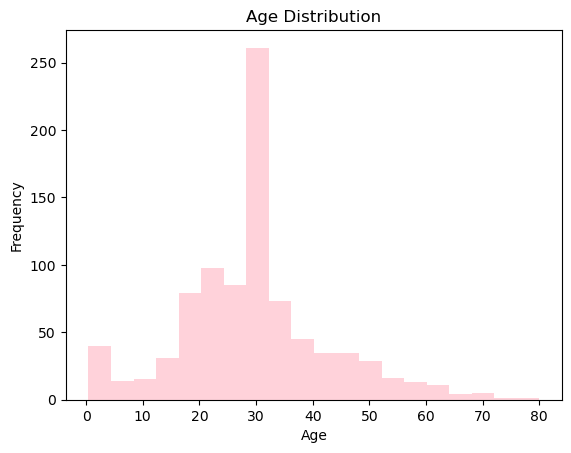

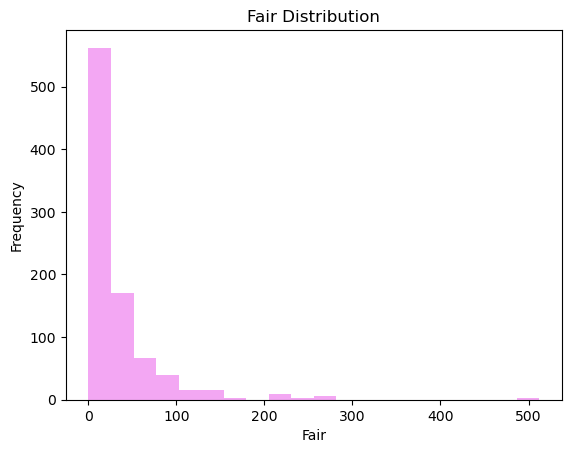

In [14]:
# Histogram for 'Age' and 'Fare'
plt.hist(titanic['Age'], bins=20, color='pink', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(titanic['Fare'],bins=20, color='violet', alpha=0.7)
plt.title('Fair Distribution')
plt.xlabel('Fair')
plt.ylabel('Frequency')
plt.show()

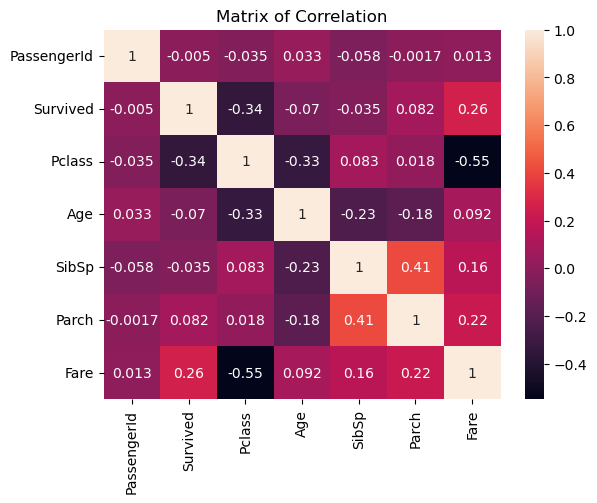

In [15]:
# Correlation analysis for numerical features
numerical_cols = titanic.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = titanic[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Matrix of Correlation')
plt.show()


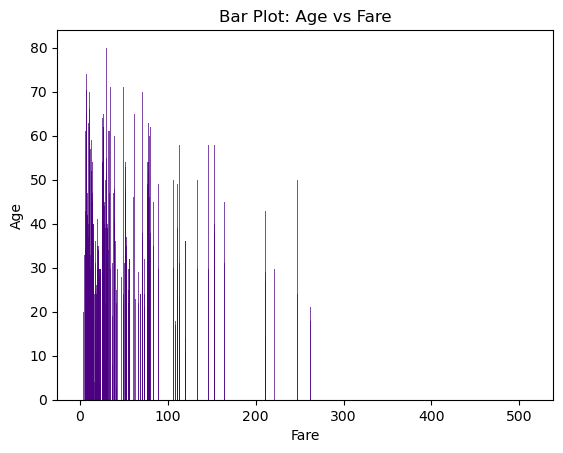

In [16]:
# Scatter plot for Age vs. Fare
plt.bar(titanic['Fare'], titanic['Age'], color='indigo', alpha=0.7)
plt.title('Bar Plot: Age vs Fare')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()


In [17]:
titanic.set_index('PassengerId',inplace=True)

In [18]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,cabin_mode,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,cabin_mode,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,cabin_mode,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,cabin_mode,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,cabin_mode,S


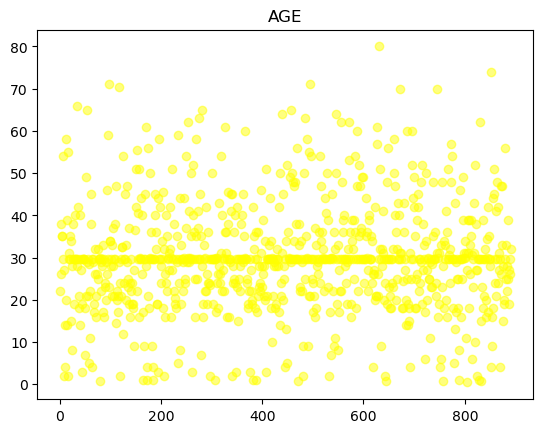

In [19]:
# Scatter plot for Age vs. Fare
plt.scatter(titanic.index,titanic['Age'], color='yellow', alpha=0.5)
plt.title('AGE')
plt.show()

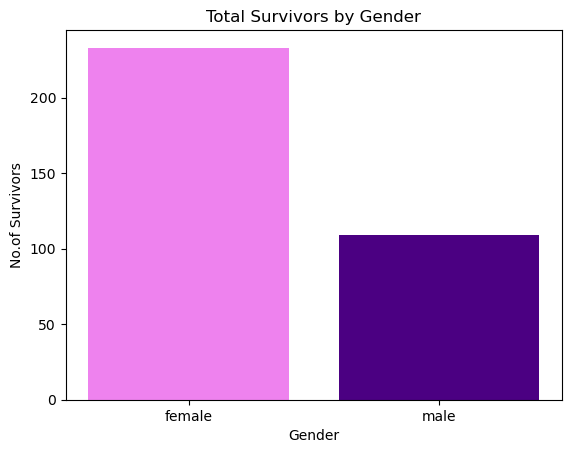

In [20]:
survival = titanic.groupby('Sex')['Survived'].sum()

# Plot the bar chart
plt.bar(survival.index,survival.values, color=['violet', 'indigo'])

# Labels and title
plt.title('Total Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('No.of Survivors')

# Show the plot
plt.show()

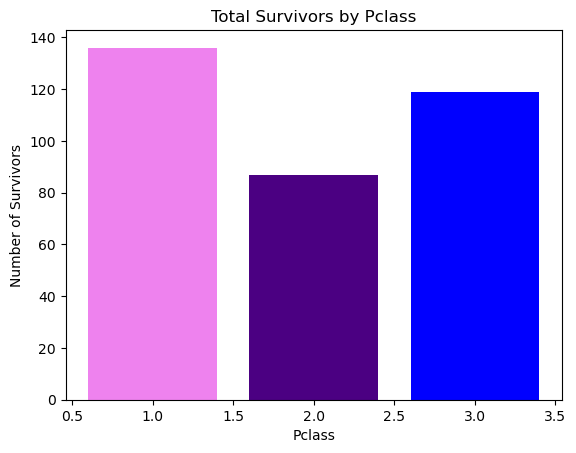

In [21]:
survival = titanic.groupby('Pclass')['Survived'].sum()

# Plot the bar chart
plt.bar(survival.index,survival.values, color=['violet', 'indigo','blue'])

# Labels and title
plt.title('Total Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')

# Show the plot
plt.show()

In [22]:
survival

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

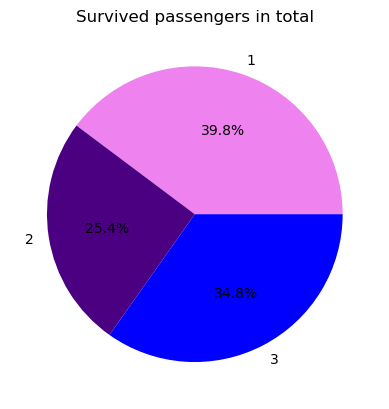

In [23]:
plt.pie(survival.values,labels=survival.index, autopct='%1.1f%%',colors=['violet', 'indigo','blue'])
plt.title('Survived passengers in total')
# Show plot
plt.show()

In [24]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


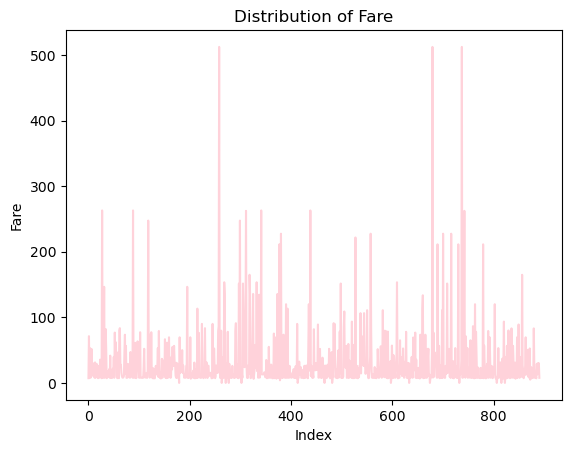

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(data_url)
plt.plot(titanic['Fare'], color='pink', alpha=0.7)
plt.title('Distribution of Fare')
plt.xlabel('Index')
plt.ylabel('Fare')
plt.show()